# Лабораторная работа 1 
----
### Аналоговые сигналы, модуляция



In [44]:
from scipy.fft import fft, rfft, fftshift
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import matplotlib as mpl

1. Построить временные диаграммы гармонических сигналов для произвольных значений амплитуды и начальной фазы (но одинаковых для каждого случая), но 10 различных частот в диапазоне от 1 до 100 кГц. 


Исходные данные: 
Гармонический сигнал задается уравнением:
$$s(t)=A cos(2\pi Ft+\phi_0),$$
где $A$ - амплитуда, $f$ - частота сигнала, $\phi_0$ - начальная фаза.



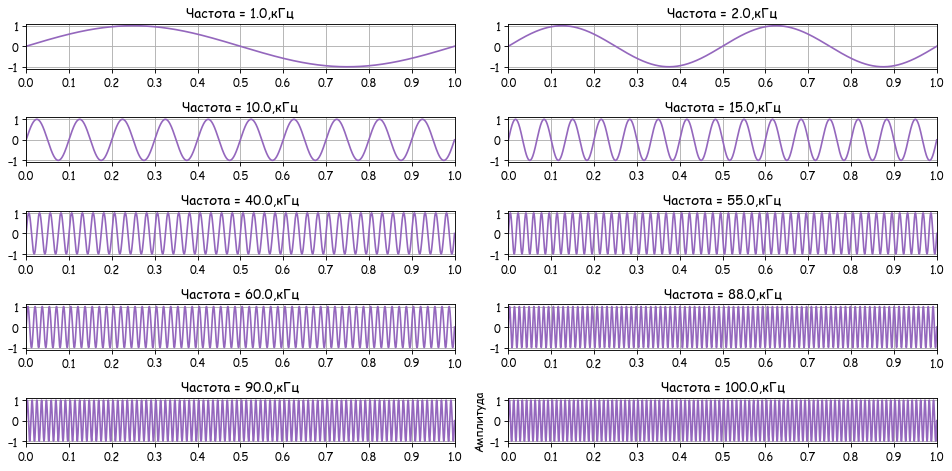

In [6]:
mpl.rcParams['font.family'] = 'fantasy'
mpl.rcParams['font.fantasy'] = 'Comic Sans MS, Arial'
n = 2000
t = np.linspace(0, 1, n, endpoint=True)
# list of frequencies
f_list = np.array([1.0, 2.0, 10.0, 15.0,
                    40.0, 55.0, 60.0, 88.0, 90.0, 100.0])

plt.figure(figsize=(12, 6), dpi=80)
for i, freq in enumerate(f_list):
    plt.subplot(5, 2, i+1)
    plt.plot(t, np.sin(2*np.pi*freq*t), color='C4')
    plt.title(f'Частота = {freq},кГц')   
    plt.xlim([0, 1])
    plt.xticks(np.linspace(0, 1, 11, endpoint=True))
    plt.grid()
plt.ylabel('Амплитуда')
plt.tight_layout()


2. Построить временную диаграмму и спектр периодического прямоугольного сигнала (периодической последовательности прямоугольных импульсов) с амплитудой 1, длительностью импульсов 0.5 мс, периодом следования 1 мс. 

Периодический прямоугольный сигнал можно задать как последовательность двоичных данных или как меандр.


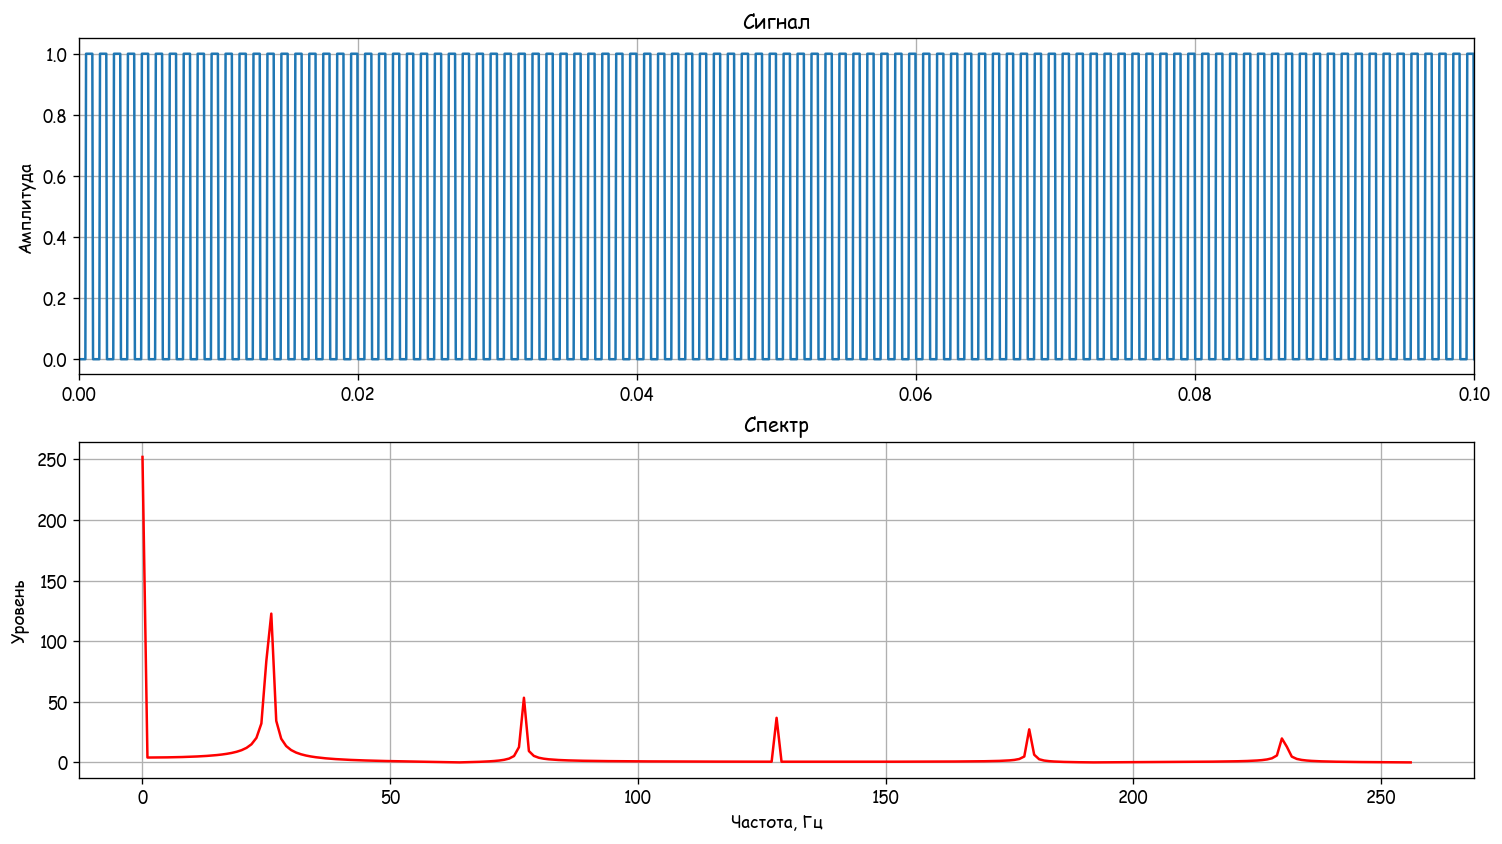

In [12]:
# наиболее вероятный
T = 0.0005
D = 10 / 1000
N = 1000

x = np.linspace(0, T * N, 10000) #, endpoint=False
y = signal.square(np.pi * 2000 * x + np.pi)
bins = np.array([-np.inf, 0]) 
z= np.digitize(y, bins) - 1

plt.figure(figsize=(15, 8), dpi=120)
plt.subplot(2, 1, 1)
plt.plot(x, z)
plt.xlim([0., 0.1])
plt.ylabel('Амплитуда')
plt.title('Сигнал')
plt.grid()

yy = rfft(z, 512) # проводим преобразование фурье
xx = (abs(yy))
n = len(y)

plt.subplot(2, 1, 2)
plt.plot(xx, 'r-') 
plt.xlabel('Частота, Гц')
plt.ylabel('Уровень')
plt.title('Спектр')
plt.grid()
plt.show()

Спектр периодического сигнала состоит из дискретных синусоидальных составляющих. Первой гармонике соответствуют частота 50 Гц – это частота повторения импульсов. Частота 100 Гц соответствуют длительности импульса. То есть спектр прямоугольного периодического представляет собой:
$$S(\omega)=A\frac{sin \left( \frac{\omega_n}{2} τ \right) }{\frac{\omega_n}{2}T}=\frac{Aτ}{T}sinc \left(\frac{\omega_n}{2}τ \right) $$

3. Постройте временную диаграмму и спектр модулированного по амплитуде гармонического сигнала со следующими параметрами: амплитуда несущей 1, глубина модуляции 0.5, частота несущей 100 кГц, частота модулирующего сигнала 20 кГц, начальная фаза 0.
Постройте временные диаграммы и спектры этого сигнала для 3 любых значений частоты несущей из диапазона от 21 до 200 кГц. 
Постройте временные диаграммы и спектры этого сигнала для 3 любых значений частоты модулирующего сигнала из диапазона от 1 до 20 кГц.
Постройте временные диаграммы и спектры этого сигнала для 3 любых значений глубины модуляции из диапазона от 0 до 1. 


Вид простейшего гармонического АМ-сигнала: $$s(t)=A_c(1+mcos(\omega_m t+\phi))cos(\omega_c t),$$
где $A_c$ - амплитуда несущего сигнала,
$\omega_c$ - частота несущего сигнала,
$\omega_m$ - частота модулирующего\информационного сигнала,
$\phi$ - начальная фаза модулирующего сигнала,
$m$ - коэффициент модуляции.



Передаваемый сигнал состоит из несущего колебания и двух боковых полос. Модулирующая частота, на которой передается информация, низкочастотная. Спектр АМ-сигнала всегда симметричен относительно центральной (несущей) частоты, которая не несет полезной информации.

Спектр и Сигнал при коэффициене модуляции [0.1, 0.34, 0.95, 2.5]


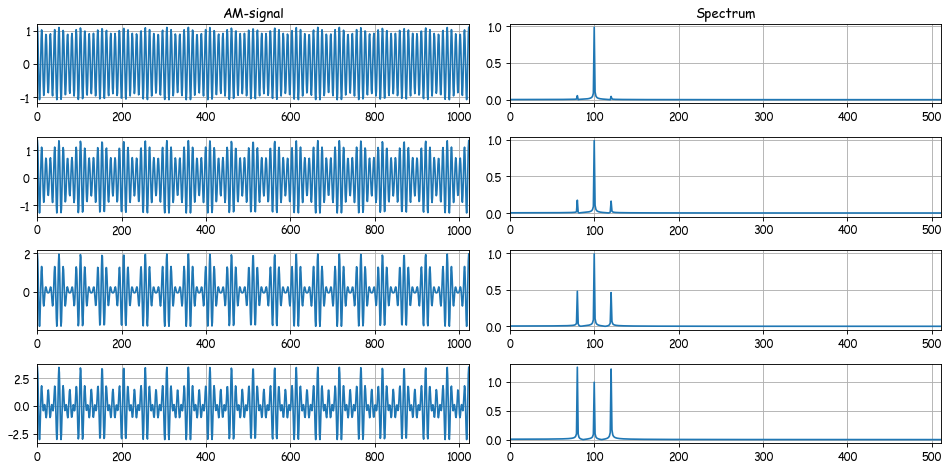

In [24]:
def signal_am(amp, km, fc, fs, period):
    tt = 2.0 * np.pi * np.linspace(0, 1, period)
    return amp * (1 + km * np.cos(fs * tt)) * np.cos(fc * tt)


def plott(km, sig, sft, a='AM'):
    plt.figure(figsize=(12, 6), dpi=80)
    for i, freq in enumerate(km):
        plt.subplot(len(km), 2, 2 * i + 1)
        if i == 0:
            plt.title(f'{a}-signal')
        plt.plot(sig[i])
        plt.xlim([0, N-1])
        plt.grid(True)
        
        plt.subplot(len(km), 2, 2 * i + 2)
        if i == 0:
            plt.title('Spectrum')
        plt.plot(sft[i])
        plt.xlim([0, N//2-1])
        plt.grid(True)
    plt.tight_layout()

N = 1024
# Create AM-signal
fs = 20  # Modulation frequency
fc = 100  # Carrier frequency
km = [0.1 ,0.34, 0.95, 2.5]
sig = [signal_am(amp=1.0, km=i, fc=fc, fs=fs, period=N) for i in km]

# Calculate FFT
sft = np.abs(rfft(sig, axis=1)) / N / 0.5
plott(km, sig, sft)
print(f"Спектр и Сигнал при коэффициене модуляции {km}")


Как видно, при изменении коэффициента модуляции, спектр сигнала остается на месте. Меняется только уровень боковых составляющих. При коэффициенте модуляции более 1 возникает перемодуляция и уровень модулирующей частоты становится равен или выше уровня несущей. Максимальное значение коэффициента модуляции, при котором не возникает перемодуляции АМ-сигнала $km=1$.

АМ-сигнал и его спектр с частотой модуляции [20, 90, 100]


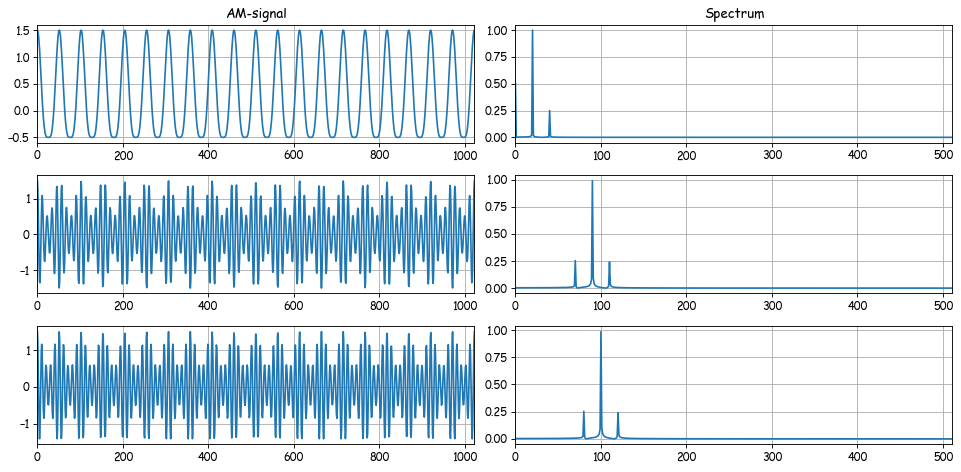

In [20]:
fc = [20, 90, 100]  # Carrier frequency
s = [signal_am(amp=1.0, km=0.5, fc=_, fs=fs, period=N) for _ in fc]

# Calculate FFT
ft = np.abs(rfft(s, axis=1)) / N / 0.5
plott(fc, s, ft)
print(f"АМ-сигнал и его спектр с частотой модуляции {fc}")


При изменении несущей частоты происходит смещение всего АМ-сигнала по частоте.

АМ-сигнал и его спектр с несущей частотой 100 кГц частотами модуляции [20, 90, 100]


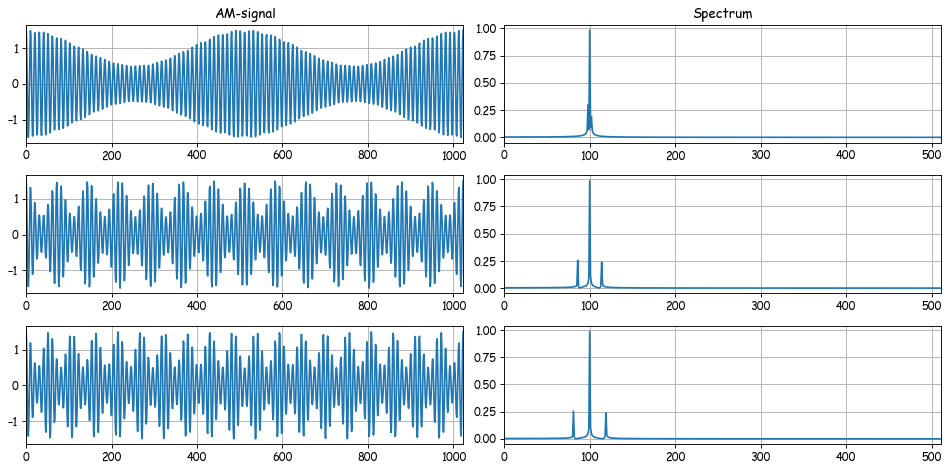

In [21]:
fs = [2, 14, 19] 
s = [signal_am(amp=1.0, km=0.5, fc=100, fs=_, period=N) for _ in fs]

# Calculate FFT
ft = np.abs(rfft(s, axis=1)) / N / 0.5
plott(fs, s, ft)
print(f"АМ-сигнал и его спектр с несущей частотой 100 кГц частотами модуляции {fc}")

Как видно, при изменении модулирующей частоты, спектр не сдвигается, но изменяется расстояние между центральной (несущей) частотой и боковыми (модулирующими) частотами.

4. Постройте временную диаграмму и спектр модулированного по частоте гармонического сигнала со следующими параметрами: амплитуда несущей 1, частотная девиация 50 кГц, частота несущей 100 кГц, частота модулирующего сигнала 10 кГц, амплитуда модулирующего сигнала 1, начальная фаза 0. 
Постройте временные диаграммы и спектры этого сигнала для 3 любых значений частоты модулирующего сигнала из диапазона от 1 до 25 кГц.
В случае частотной модуляции гармоническим колебанием сигнал описывается:
$$s(t)=A cos\left( 2\pi f_ct+A_m \frac{f_\delta}{f_m}sin(2\pi f_mt)\right),$$
где $A_s$ - амплитуда несущего колебания,
$A_m$ - амплитуда модулирующего колебания,
$f_c$ - частота несущего колебания,
$f_m$ - частота модулирубщего сигнала,
$f_\delta$ - девиация частоты.


ЧМ-сигнал и его спектр с частотой модулирующего сигнала [2, 10, 20]


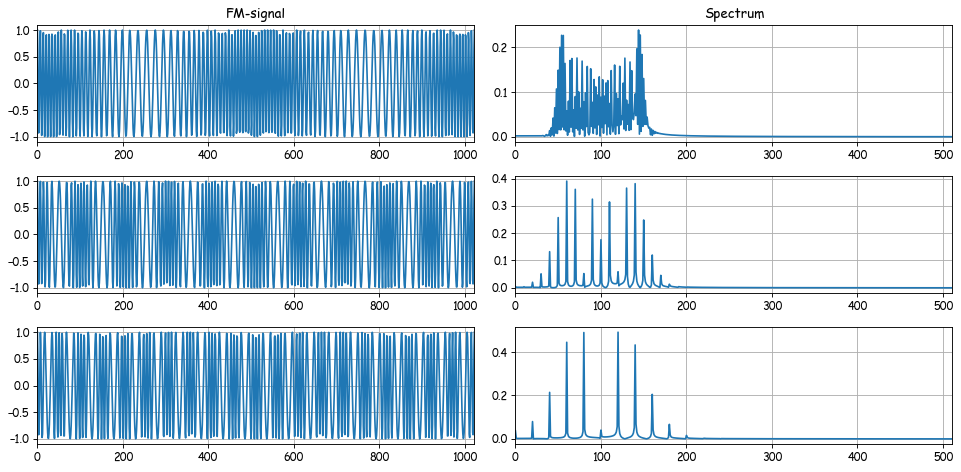

In [28]:
def signal_fm(amp,kd,fc,fs,period):
    tt = 2.0 * np.pi * np.linspace(0, 1, period)
    return amp * np.cos(fc * tt + kd/fs * np.sin(fs * tt))


N=1024
# Create FM-signal
fs = [2,10,20]  # Modulation frequency
fc = 100  # Carrier frequency
kd = 50
sig = [signal_fm(amp=1.0, kd=kd, fc=fc, fs=i, period=N) for i in fs]
# Calculate FFT
sft = np.abs(fft(sig, axis=1)) / N / 0.5

plott(fs, sig, sft, a='FM')
print(f'ЧМ-сигнал и его спектр с частотой модулирующего сигнала {fs}')

Изменение модулирующей частоты влечет за собой, соответственно, изменение индекса модуляции, числа и величины пиков спектра.

5. Построить временные диаграммы и спектры частотно-модулированного и фазово-модулированного сигналов при следующих параметрах: частота несущей 100 МГц, амплитуда несущей 1, индекс фазовой модуляции 5, девиация частоты 50 кГц, частота модулирующего сигнала 10 кГц.


Формула сигнала с угловой модуляцией:
$$s(t)=Acos(2\pi f_ct+ku_m(t)),$$
где $u_m$ - модулирующий информационный сигнал, $k$ – индекс фазовой частоты, $f_c$ – частота несущего сигнала.



ЧМ- и ФМ-сигнал и спектр с несущей частотой 100 МГц


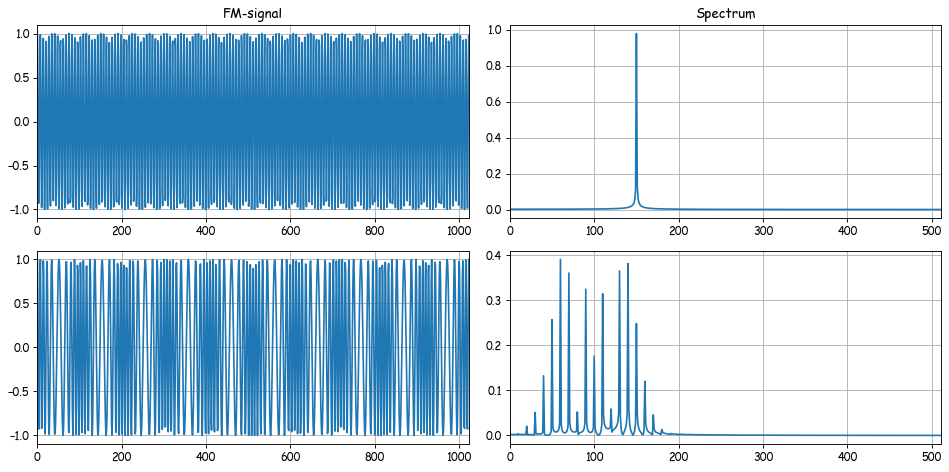

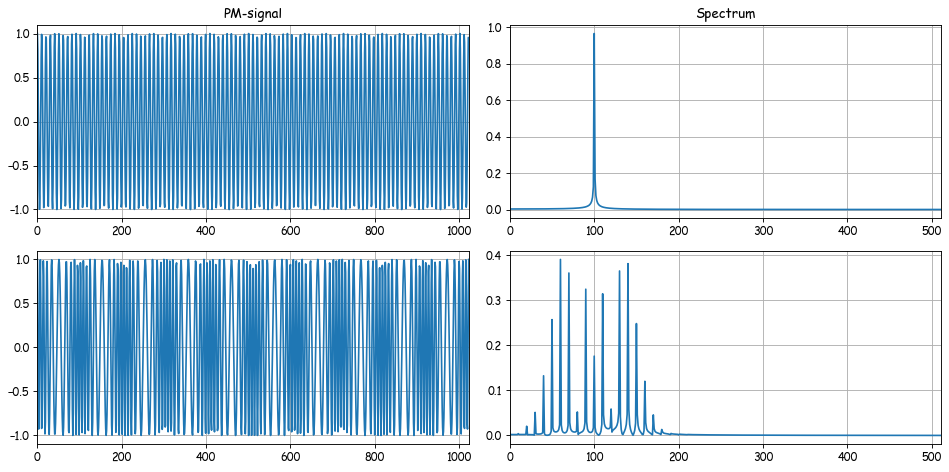

In [73]:
def SIG(amp, k, fc, fs, period):
    t= 2.0 * np.pi * np.linspace(0, 1, period)
    u= amp * np.sin(fs *t)
    return amp * np.cos(fc*t + k * u)


# Create FM-signal
fs = [0.01, 10] # Modulation frequency
sign = [signal_fm(amp=1.0, kd=50, fc=100, fs=i, period=N) for i in fs]
# Calculate FFT
ft = np.abs(fft(sign, axis=1)) / N / 0.5
# Create PM-signal
Sig = [SIG(amp=1.0, k=5, fc=100, fs=i, period=N) for i in fs]
# Calculate FFT
ffT = np.abs(fft(Sig, axis=1)) / N / 0.5
plott(fs, sign, ft, a='FM')
plott(fs, Sig, ffT, a='PM')
print("ЧМ- и ФМ-сигнал и спектр с несущей частотой 100 МГц")

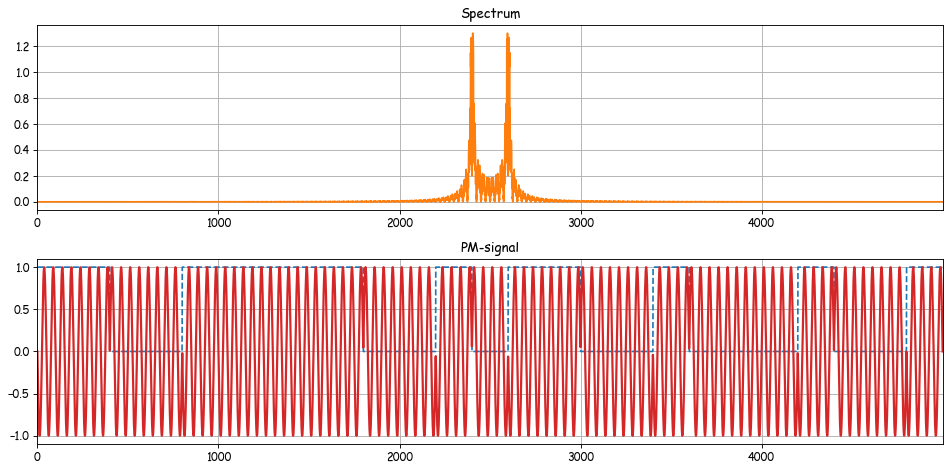

In [43]:
# Digital signal
n = 200
# Random array of ones and zeros
np.random.seed(1)
mod_rnd = np.random.randint(0, 2, 25)
mod_psk = np.repeat(mod_rnd, repeats=n)
# PSK signal
m = mod_psk.size
sig_psk = [np.sin(100 * 2.0 * np.pi * np.linspace(0, 1, m) + 5*np.pi*mod_psk)]
Sft = np.abs(fft(sig_psk, axis=1)) / N / 0.5
e = fftshift(Sft)
# PLot results
plt.figure(figsize=(12, 6), dpi=80)
plt.subplot(2, 1, 1)
plt.title('Spectrum')
plt.plot(e[0], color='C1', linewidth=1.5)
plt.xlim([0, m-1])
plt.grid(True)
 
plt.subplot(2, 1, 2)
plt.title('PM-signal')
plt.plot(mod_psk, '--', color='C0', linewidth=1.5)
plt.plot(sig_psk[0], '-', color='C3', linewidth=2.0)
plt.xlim([0, m-1])
plt.grid(True)
plt.tight_layout()